In [1]:
from sklearn.svm import SVC
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# загружаем и разбиваем данные
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

# вычисляем минимум и максимум по обучающим данным
scaler = MinMaxScaler().fit(X_train)

In [2]:
#  масштабируем обучающие данные
X_train_scaled = scaler.transform(X_train)
svm = SVC()

# строим SVM на масштабированных обучающих данных
svm.fit(X_train_scaled, y_train)

# масштабируем тестовые данные и оцениваем качество на масштабированных данных
X_test_scaled = scaler.transform(X_test)
print("Правильность на тестовом наборе: {:.2f}".format(svm.score(X_test_scaled, y_test)))

Правильность на тестовом наборе: 0.97


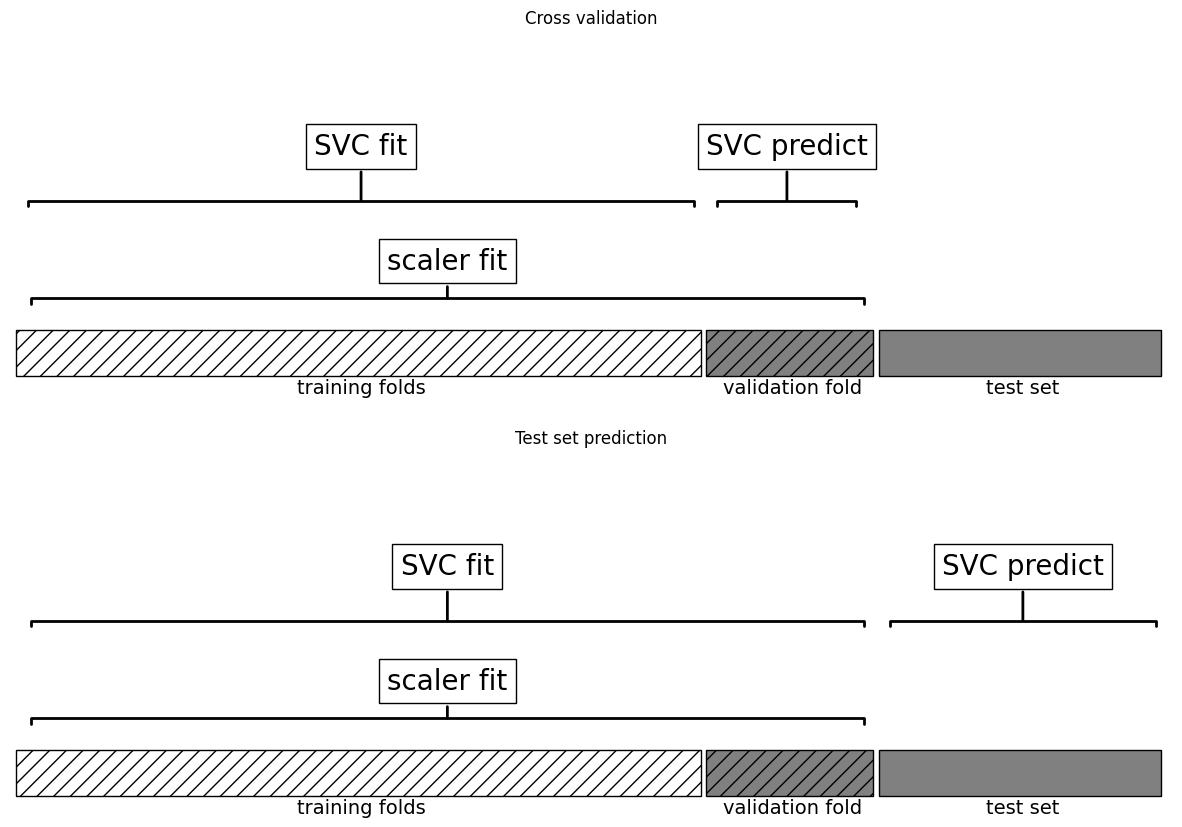

In [4]:
import mglearn
mglearn.plots.plot_improper_processing()

In [5]:
from sklearn.pipeline import Pipeline
pipe = Pipeline([("scaler", MinMaxScaler()), ("svm", SVC())])

In [6]:
pipe.fit(X_train, y_train)

,steps,"[('scaler', ...), ('svm', ...)]"
,transform_input,None
,memory,None
,verbose,False
,feature_range,"(0, ...)"
,copy,True
,clip,False
,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'


In [7]:
print("Правильность на тестовом наборе: {:.2f}".format(pipe.score(X_test, y_test)))

Правильность на тестовом наборе: 0.97


In [8]:
param_grid = {'svm__C': [0.001, 0.01, 0.1, 1, 10, 100],
              'svm__gamma': [0.001, 0.01, 0.1, 1, 10, 100]}

In [9]:
from sklearn.model_selection import GridSearchCV

grid = GridSearchCV(pipe, param_grid=param_grid, cv=5)
grid.fit(X_train, y_train)

print("Наил значение правильности перекр проверки: {:.2f}".format(grid.best_score_))
print("Правильность на тестовом наборе: {:.2f}".format(grid.score(X_test, y_test)))
print("Наилучшие параметры: {}".format(grid.best_params_))

Наил значение правильности перекр проверки: 0.98
Правильность на тестовом наборе: 0.97
Наилучшие параметры: {'svm__C': 1, 'svm__gamma': 1}


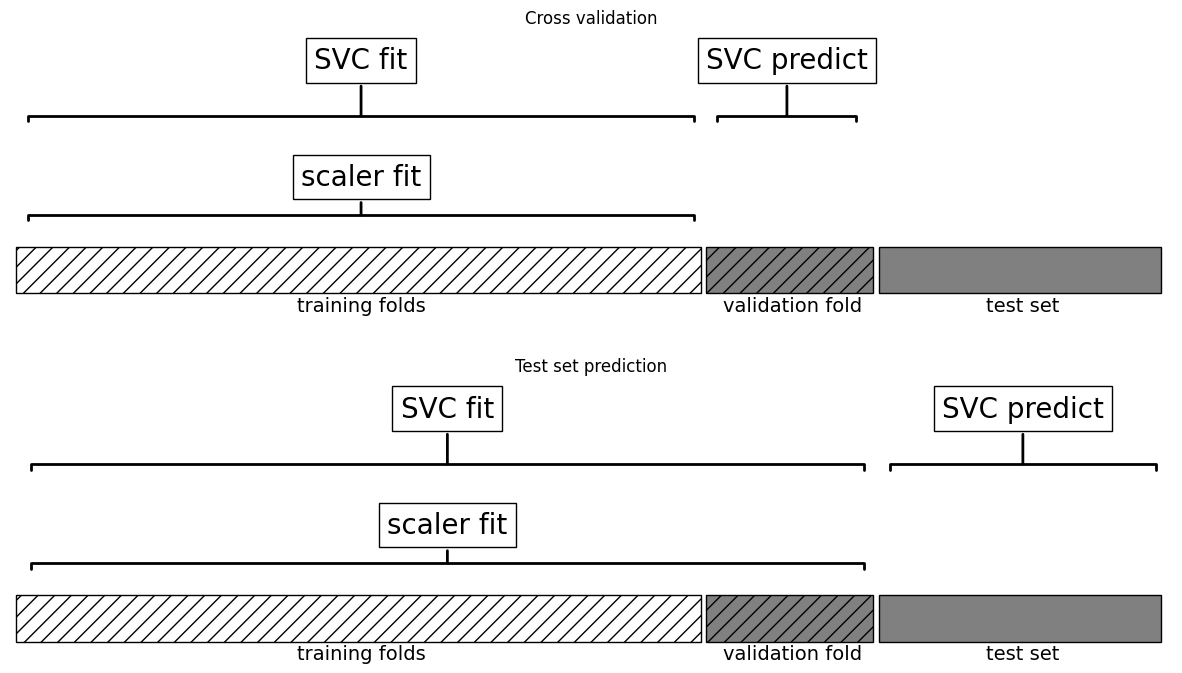

In [10]:
mglearn.plots.plot_proper_processing()

In [11]:
import numpy as np

rnd = np.random.RandomState(seed=0)
X = rnd.normal(size=(100, 10000))
y = rnd.normal(size=(100,))

In [12]:
from sklearn.feature_selection import SelectPercentile, f_regression

select = SelectPercentile(score_func=f_regression, percentile=5).fit(X, y)
X_selected = select.transform(X)

print("форма массива X_selected: {}".format(X_selected.shape))

форма массива X_selected: (100, 500)


In [13]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge

print("Правильность перекр проверки (cv только для ridge): {:.2f}".format(np.mean(cross_val_score(Ridge(), X_selected, y, cv=5))))

Правильность перекр проверки (cv только для ridge): 0.91


In [14]:
pipe = Pipeline([("select", SelectPercentile(score_func=f_regression, percentile=5)), ("ridge", Ridge())])
print("Правильность перекр проверки (конвейер): {:.2f}".format(np.mean(cross_val_score(pipe, X, y, cv=5))))

Правильность перекр проверки (конвейер): -0.25


In [15]:
def fit(self, X, y):
    X_transformed = X
    for name, estimator in self.steps[:-1]:
        # перебираем все этапы, кроме последнего
        # подгоняем и преобразуем данные
        X_transformed = estimator.fit_transform(X_transformed, y)
    # осуществляем подгонку на последнем этапе
    self.steps[-1][1].fit(X_transformed, y)
    return self

In [16]:
def predict(self, X):
    X_transformed = X
    for step in self.steps[:-1]:
        # перебираем все этапы, кроме последнего
        # преобразуем данные
        X_transformed = step[1].transform(X_transformed)
    # получаем прогнозы на последнем этапе
    return self.steps[-1][1].predict(X_transformed)

In [17]:
from sklearn.pipeline import make_pipeline

# стандартный синтаксис
pipe_long = Pipeline([("scaler", MinMaxScaler()), ("svm", SVC(C=100))])

# сокращенный синтаксис
pipe_short = make_pipeline(MinMaxScaler(), SVC(C=100))

In [18]:
print("Этапы конвейера:\n{}".format(pipe_short.steps))

Этапы конвейера:
[('minmaxscaler', MinMaxScaler()), ('svc', SVC(C=100))]


In [19]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

pipe = make_pipeline(StandardScaler(), PCA(n_components=2), StandardScaler())
print("Этапы конвейера:\n{}".format(pipe.steps))

Этапы конвейера:
[('standardscaler-1', StandardScaler()), ('pca', PCA(n_components=2)), ('standardscaler-2', StandardScaler())]


In [20]:
# подгоняем заранее заданный конвейер к набору данных cancer
pipe.fit(cancer.data)

# извлекаем первые две главные компоненты на этапе "pca"
components = pipe.named_steps["pca"].components_

print("форма components: {}".format(components.shape))

форма components: (2, 30)


In [21]:
from sklearn.linear_model import LogisticRegression

pipe = make_pipeline(StandardScaler(), LogisticRegression())

In [22]:
param_grid = {'logisticregression__C': [0.01, 0.1, 1, 10, 100]}

In [23]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=4)
grid = GridSearchCV(pipe, param_grid, cv=5)
grid.fit(X_train, y_train)

,estimator,Pipeline(step...egression())])
,param_grid,"{'logisticregression__C': [0.01, 0.1, ...]}"
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,copy,True


In [24]:
print("Лучшая модель:\n{}".format(grid.best_estimator_))

Лучшая модель:
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression(C=1))])


In [25]:
print("Этап логистической регрессии:\n{}".format(grid.best_estimator_.named_steps["logisticregression"]))

Этап логистической регрессии:
LogisticRegression(C=1)


In [26]:
print("Коэффициенты логистической регрессии:\n{}".format(grid.best_estimator_.named_steps["logisticregression"].coef_))

Коэффициенты логистической регрессии:
[[-0.4475566  -0.34609376 -0.41703843 -0.52889408 -0.15784407  0.60271339
  -0.71771325 -0.78367478  0.04847448  0.27478533 -1.29504052  0.05314385
  -0.69103766 -0.91925087 -0.14791795  0.46138699 -0.1264859  -0.10289486
   0.42812714  0.71492797 -1.08532414 -1.09273614 -0.85133685 -1.04104568
  -0.72839683  0.07656216 -0.83641023 -0.64928603 -0.6491432  -0.42968125]]


In [27]:
pipe = Pipeline([('preprocessing', StandardScaler()), ('classifier', SVC())])

In [28]:
from sklearn.ensemble import RandomForestClassifier

param_grid = [{'classifier': [SVC()], 'preprocessing': [StandardScaler(), None],
               'classifier__gamma': [0.001, 0.01, 0.1, 1, 10, 100],
               'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100]},
              {'classifier': [RandomForestClassifier(n_estimators=100)],
               'preprocessing': [None], 'classifier__max_features': [1, 2, 3]}]

In [29]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

grid = GridSearchCV(pipe, param_grid, cv=5)
grid.fit(X_train, y_train)

print("Наилучшие параметры:\n{}\n".format(grid.best_params_))
print("Наил значение правильности перекр проверки: {:.2f}".format(grid.best_score_))
print("Правильность на тестовом наборе: {:.2f}".format(grid.score(X_test, y_test)))

Наилучшие параметры:
{'classifier': SVC(), 'classifier__C': 10, 'classifier__gamma': 0.01, 'preprocessing': StandardScaler()}

Наил значение правильности перекр проверки: 0.99
Правильность на тестовом наборе: 0.98
